---
title: "Probability"
toc: true
---


Probability allows us to talk about uncertainty, in certain terms. Once, we are able to quantify uncertainties, we can deterministically make deductions about the future. The language of statistics also allows us to talk about uncertainty in uncertain but tractable terms that we can reason about.

In the context of probability, note that we are going to be concerned with column vectors more than row vectors. In a pandas DataFrame, these column vectors are the columns of the DataFrame aka features.

In [22]:
import pandas as pd

data = pd.read_csv("../data/Shark Tank US dataset.csv")

data = data[data.columns[:30]]
data.head(2)

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,...,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Advisory Shares Equity,Loan
0,1,AvaTheElephant,1,1,9-Aug-09,5-Feb-10,9-Aug-09,Health/Wellness,Ava The Elephant - Baby and Child Care,http://www.avatheelephant.com/,...,1,50000.0,55.0,90909.0,1.0,50000.0,55.0,NaN,NaN,NaN
1,1,MrTod'sPieFactory,1,2,9-Aug-09,5-Feb-10,9-Aug-09,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,http://whybake.com/,...,1,460000.0,50.0,920000.0,2.0,230000.0,25.0,NaN,NaN,NaN


## Random Variable

A **random variable** is a mathematical formalization of an abstract quantity that has some degree of uncertainty associated with the values it may take on. 
The set of all possible values that a random variable can take on is called its **range**. 

**In the context of `pandas`, we are going to model columns or features as random variables.**

Just as numerical features in a `DataFrame` can be either discrete or continuous, random variables can also be either discrete or continuous. The two types require different mathematical formalizations as we will see later.

Random variables are usually denoted by capital letters, such as $X$ or $Y$. The values that a random variable can take on are denoted by lower case letters, such as $x$ or $y$.

It is also important to remember that **$x$ is a single value** but **$X$ is a collection of values** (i.e. `pd.Series`). 

In the example below, `Got Deal` and `Deal Valuation` are two random variables in `data`

In [25]:
data[['Got Deal', 'Deal Valuation']]

,Got Deal,Deal Valuation
0,1,90909.0
1,1,920000.0
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1360,1,3125000.0
1361,0,NaN
1362,0,NaN
1363,1,3000000.0


The ranges of $C$ and $D$ are $\{H, T\}$ and $\{1, 2, 3, 4, 5, 6\}$ respectively. It is worth repeating for emphasis that the ranges of the two variables is independent of observed data, since the observed data is a limited sample.

## Experiment, Outcome $\omega$ and Sample Space $\Omega$

An **outcome**, denoted by $\omega$, is the set of values that one or more random variables take on as a result of an **experiment**.

An **experiment** is a process that yields outcomes out of set of all possible outcomes. 

The **sample space**, denoted by $\Omega$, is the set of all possible outcomes. 

The important operative word here is _"possible"_. <u>The sample space is _not_ the set of all _observed_ outcomes</u>, the set of all possible outcomes.

If an experiment involves two random variables say $X$ and $Y$ which _can_ take on $n$ possible values (i.e. $~\text{range}_X = \{x_1, x_2, \ldots, x_n\})$ and $m$ possible values (i.e. $~\text{range}_Y = \{y_1, y_2, \ldots, y_m\}$) respectively, then the sample space $\Omega$ is the set of all possible combinations of $x_i$ and $y_j$ and is of size $n \times m$. 

<br/>
<center>

|**$\omega_i$** | **$X$** | **$Y$** | 
|:----:|:----:|:----:|
|$\omega_1$ | $x_1$ | $y_1$ | 
|$\omega_2$ | $x_1$ | $y_2$ | 
|: | : | : | 
| $\omega_{m}$ | $x_1$ | $y_m$ |
| $\omega_{m+1}$ | $x_2$ | $y_1$ |
| $\omega_{m+2}$ | $x_2$ | $y_2$ |
|: | : | : | 
| $\omega_{n \times m}$ | $x_n$ | $y_m$ |

</center>
<br/>

In other words, the sample space is the **cross product of the ranges of all random variables** involved in the experiment.

In our example, the experiment is the act of tossing a coin and rolling a dice. 

Each row in the data is an outcome $w_i$ from the set of all possible outcomes $\Omega$. 

For example, coin flip $C$ variable can take on two ($n=2$) values: $\{H, T\}$ and dice roll $D$ variable can take on six $m=6$ value: $\{1, 2, 3, 4, 5, 6\}$. This means that the sample space $\Omega$ is of size $n \times m = 2 \times 6 = 12$.

## Observed Sample Space

If we have a Series with many repeated values, then [`.unique()`](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) can be used to identify only the *unique* values. 

It is important to note that in the real world, it is _often impossible to obtain the range_ of a random variable. Since most real-world datasets are **samples**, **`df['X'].unique()` does not necessarily give us the range of $X$**.

Here we return an array of all the Industries in the Shark Tank dataset. 

In [16]:
data['Industry'].unique()

array(['Health/Wellness', 'Food and Beverage', 'Business Services',
       'Lifestyle/Home', 'Software/Tech', 'Children/Education',
       'Automotive', 'Fashion/Beauty', 'Media/Entertainment',
       'Fitness/Sports/Outdoors', 'Pet Products', 'Electronics',
       'Green/CleanTech', 'Travel', 'Uncertain/Other', 'Liquor/Alcohol'],
      dtype=object)

## Frequency Distributions

A frequency distribution is a table that shows the frequency of various values in a dataset. The frequency of a value is the number of times it appears in the dataset.

The [`Series.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) methods counts the number of occurrence of each unique value in a `Series`. In other words, it *counts* the number of times each unique *value* appears. This is often useful for determining the most or least common entries in a `Series`.

In the example below, we can determine the frequency of startups that got a deal in the dataset.

In [12]:
data["Got Deal"].value_counts()

1    826
0    539
Name: Got Deal, dtype: int64

## Probability Model $P(X)$

Probability model is a function that assigns a probability score $P(\omega_i)$ to each possible outcome $\omega_i$ for every $\omega_i \in \Omega$ such that 
<!-- $ 0 \lt P(\omega_i) \lt 1 $ and $\sum_{\omega \in \Omega} P(\omega_i) = 1$. -->
<!-- such that  -->

$$ 0 \lt P(\omega_i) \lt 1 ~~~\text{and}~~~ \sum_{\omega \in \Omega} P(\omega_i) = 1$$

For example, if we have a random variable $D$ for rolling a die, the probability model assigns a probability to each number that we can roll. The probability model is usually denoted by $P(\omega_i)$ or $P(D=d)$


$\omega$ | $D$ | $P(D=d)$ |
:-------:|:----:|:-----:|
$\omega_1$ | $1$ | $P(D=1)$ |
$\omega_2$ | $2$  | $P(D=2)$ |
$\omega_3$ | $3$  | $P(D=3)$ |
$\omega_4$ | $4$  | $P(D=4)$ |
$\omega_5$ | $5$  | $P(D=5)$ |
$\omega_6$ | $6$  | $P(D=6)$ |

such that $0 \leq P(D=d) \leq 1$ and and $\sum_{d \in D} P(d=D) = 1$.

In [27]:
data['Got Deal'].value_counts() / len(data)

1    0.605128
0    0.394872
Name: Got Deal, dtype: float64

In [28]:
data['Got Deal'].value_counts(normalize=True)

1    0.605128
0    0.394872
Name: Got Deal, dtype: float64

::: {.callout-caution}

 A word of caution on <u>mathematical notation</u> and <u>dimensionality</u>: 

Uppercase letters ($X, Y ...$) often refer to a random variable. Lowercase letters ($x, y ...$) often refer to a particular outcome of a random variable.

The following refer to a probability <u>value</u> (`int`, `float` etc.):

* $P(X = x)$ 
    
    * also written in shorthand as $P(x)$

* $P(X = x ∧ Y = y)$  
    
    * also written in shorthand as $P(x, y)$

The following refer to <u>a collection of values</u> (`pd.Series`, `pd.DataFrame` etc.):

* $P(X)$

* $P(X ∧ Y)$
    
    * also written as P(X, Y)

* $P(X = x, Y)$

:::

## Probability of an Event $P(\phi)$

An event $\phi$ is a set of possible worlds $\{\omega_i, \omega_j, ... \omega_n\}$. In other words, an event $\phi$ is a subset of $\Omega$ i.e. $\phi \subset \Omega$

If we continue with the example of rolling a die, we can define an event $\phi$ as the set of all possible worlds where the die rolls an even number. From the table above, we can see that there are three possible worlds where the die rolls an even number. 

Therefore, the event $\phi$ is the set $\{\omega_2, \omega_4, \omega_6\}$ or $\{D=2, D=4, D=6\}$.

<!-- An example of an event is at least one Heads  $ \phi = \{\omega_1 , \omega_2 , \omega_3\}$ -->

$P (\phi) = \sum_{\omega \in \phi} P(\omega)$ is the sum of probabilities of the set of possible worlds defining $\phi$

$P (\phi_1) = P(\text{Die rolls an even number}) = P(\omega_2) +P(\omega_4) + P(\omega_6) = 0.167 + 0.167 + 0.167  \approx 0.5 $


In [ ]:
event_condition = fair_die['D'].apply(lambda x: x % 2 == 0)

event = fair_die[event_condition]

P_event = event['P(D)'].sum()

round(P_event, 2)

0.5

## Visualizing Probability Distributions

### Categorical Random Variables: Bar Plot

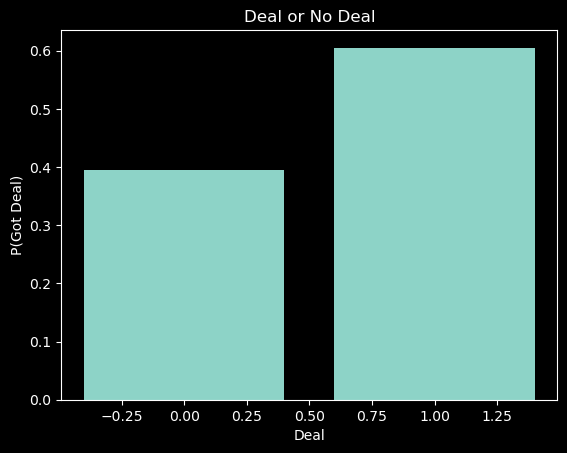

In [48]:
fig, ax = plt.subplots()

plt.style.use('dark_background')

x = data['Got Deal'].value_counts(normalize=True).index
y = data['Got Deal'].value_counts(normalize=True).values
ax.bar(x, y);

ax.set_title("Deal or No Deal")
ax.set_xlabel("Deal")
ax.set_ylabel("P(Got Deal)");

### Continuous Random Variables: Histogram

Histograms are used to visualize the distribution of continuous random variables. 

Note that the histogram is a visual representation of the frequency distribution of a continuous random variable. The height of each bar represents the frequency of the values in the bin.

Bins are intervals that divide the range of a continuous random variable into equal segments. The number of bins determines the number of intervals.

In [44]:
data.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,...,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Advisory Shares Equity,Loan
0,1,AvaTheElephant,1,1,9-Aug-09,5-Feb-10,9-Aug-09,Health/Wellness,Ava The Elephant - Baby and Child Care,http://www.avatheelephant.com/,...,1,50000.0,55.0,90909.0,1.0,50000.0,55.0,NaN,NaN,NaN
1,1,MrTod'sPieFactory,1,2,9-Aug-09,5-Feb-10,9-Aug-09,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,http://whybake.com/,...,1,460000.0,50.0,920000.0,2.0,230000.0,25.0,NaN,NaN,NaN
2,1,Wispots,1,3,9-Aug-09,5-Feb-10,9-Aug-09,Business Services,Wispots - Consumer Services,http://www.wispots.com/,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,CollegeFoxesPackingBoxes,1,4,9-Aug-09,5-Feb-10,9-Aug-09,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,http://collegehunkshaulingjunk.com/,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,IonicEar,1,5,9-Aug-09,5-Feb-10,9-Aug-09,Software/Tech,Ionic Ear - Novelties,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that histograms by default have a bin size of 10. This means that the range of the random variable is divided into 10 equal intervals.

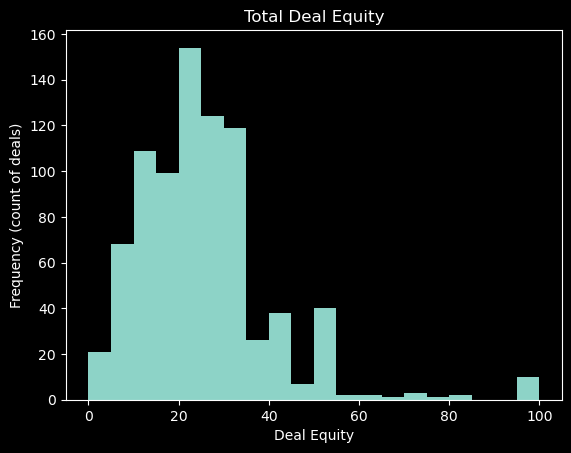

In [52]:
fig, ax = plt.subplots()

ax.hist(data['Total Deal Equity'], bins=20);
ax.set_title("Total Deal Equity")
ax.set_xlabel("Deal Equity")
ax.set_ylabel("Frequency (count of deals)");

In order to plot probabilities, we need to normalize the histogram. This is done by setting the `density` parameter to `True`. This will normalize the histogram such that the area under the histogram is equal to 1.

Also note that histograms by default do not plot probabilities. The height of each bar is the frequency of the values in the bin.

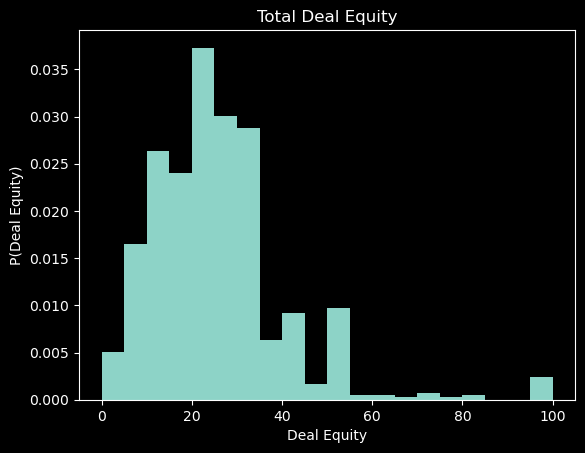

In [51]:
fig, ax = plt.subplots()

ax.hist(data['Total Deal Equity'], bins=20, density=True);
ax.set_title("Total Deal Equity")
ax.set_xlabel("Deal Equity")
ax.set_ylabel("P(Deal Equity)");